In [1]:
import os
import os.path as op
# import mne
import numpy as np
import re
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
from scipy.stats import ttest_1samp

## Decoder from tfr_morlet

In [14]:
data = {}
root = Path('../data/bids/derivatives/decoding/')
for file in root.rglob("*"):
    if 'no_crop' not in file.name:
        continue
    print(file)
    key = re.findall('(.*?)_desc', file.name)[0]
    value = np.load(file)
    if len(value) != 751:
        print(f'Wrong shape: {len(value)} instead of 751')
        continue
    data[key] = value

df = pd.DataFrame.from_dict(data)
df = df.transpose()

../data/bids/derivatives/decoding/sub-7/sub-7_task-pitch_run-1_desc-log_reg_no_crop_scores.npy
../data/bids/derivatives/decoding/sub-23/sub-23_task-pitch_run-1_desc-log_reg_no_crop_scores.npy
../data/bids/derivatives/decoding/sub-28/sub-28_task-pitch_run-1_desc-log_reg_no_crop_scores.npy
../data/bids/derivatives/decoding/sub-34/sub-34_task-pitch_run-1_desc-log_reg_no_crop_scores.npy
../data/bids/derivatives/decoding/sub-39/sub-39_task-pitch_run-1_desc-log_reg_no_crop_scores.npy
../data/bids/derivatives/decoding/sub-8/sub-8_task-pitch_run-1_desc-log_reg_no_crop_scores.npy
../data/bids/derivatives/decoding/sub-33/sub-33_task-pitch_run-1_desc-log_reg_no_crop_scores.npy
../data/bids/derivatives/decoding/sub-38/sub-38_task-pitch_run-1_desc-log_reg_no_crop_scores.npy
../data/bids/derivatives/decoding/sub-38/sub-38_task-pitch_run-2_desc-log_reg_no_crop_scores.npy
../data/bids/derivatives/decoding/sub-13/sub-13_task-pitch_run-1_desc-log_reg_no_crop_scores.npy
../data/bids/derivatives/decoding/

### Plot

In [70]:
# Reshape data for seaborn

# Rename columns for easy transformation
df_sns = df.T
cols = list(df_sns.columns)
filter_cols = re.compile('(sub-\d{1,2})_')
subs = list(map(filter_cols.findall, cols))
subs = list(itertools.chain(*subs))
df_sns.columns = subs
df_sns = df_sns.reset_index()

# Pivot data
df_sns = pd.wide_to_long(df_sns, stubnames = 'sub-', i = 'index', j = 'sub')
df_sns.columns = ['accuracy']
df_sns = df_sns.reset_index()

<AxesSubplot:xlabel='index', ylabel='accuracy'>

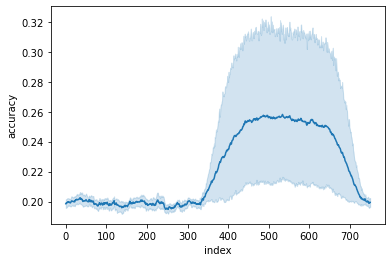

In [71]:
# Plot
sns.lineplot(data = df_sns, x = "index", y="accuracy")

### Tests

In [72]:
# T-tests
results = ttest_1samp(df, popmean = 0.20, axis = 0, alternative = 'greater')
t = results[0]
p = results[1]

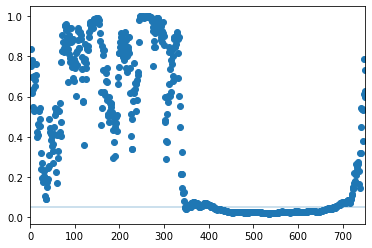

In [75]:
plt.scatter(x, p)
plt.plot([-1, 760],[0.05, 0.05], alpha = 0.3)
plt.xlim(0, 750)
plt.show()

## Decoder from stft

In [77]:
data = {}
root = Path('../data/bids/derivatives/decoding')
for file in root.rglob("*"):
    if 'stft_scores' not in file.name:
        continue
    if 'sub-2_' in file.name:
        print(f"Skipping {file}")
        continue
    key = re.findall('(.*?)_desc', file.name)[0]
    value = np.load(file)
    data[key] = value

df = pd.DataFrame.from_dict(data)
df = df.transpose()

### Plot

<AxesSubplot:xlabel='index', ylabel='accuracy'>

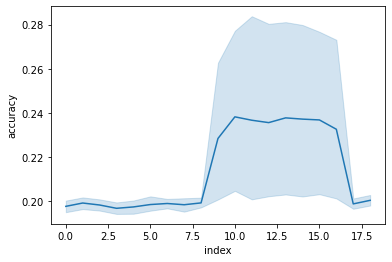

In [79]:
# Reshape data for seaborn

# Rename columns for easy transformation
df_sns = df.T
cols = list(df_sns.columns)
filter_cols = re.compile('(sub-\d{1,2})_')
subs = list(map(filter_cols.findall, cols))
subs = list(itertools.chain(*subs))
df_sns.columns = subs
df_sns = df_sns.reset_index()

# Pivot data
df_sns = pd.wide_to_long(df_sns, stubnames = 'sub-', i = 'index', j = 'sub')
df_sns.columns = ['accuracy']
df_sns = df_sns.reset_index()

# Plot
sns.lineplot(data = df_sns, x = "index", y="accuracy")

### Tests

In [8]:
# T-tests
results = ttest_1samp(df, popmean = 0.20, axis = 0, alternative = 'greater')
t = results[0]
p = results[1]

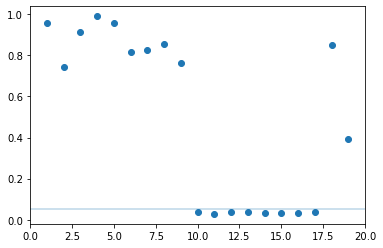

In [15]:
plt.scatter(x, p)
plt.plot([-1,20],[0.05,0.05], alpha = 0.3)
plt.xlim(0, 20)
plt.show()